In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Muones/muon2.data"
data = pd.read_csv(data, delimiter=' ')

print(data)

        40000  1724454158
0       40000  1724454159
1       40009  1724454160
2       40004  1724454161
3       40002  1724454162
4       40006  1724454163
...       ...         ...
329866  40000  1724776017
329867  40000  1724776018
329868  40000  1724776019
329869  40000  1724776020
329870  40000  1724776021

[329871 rows x 2 columns]


In [3]:
df=pd.DataFrame(data)
df=df.rename(columns={'40000':'Tiempo','1724454158':'Fecha'})
df

,Tiempo,Fecha
0,40000,1724454159
1,40009,1724454160
2,40004,1724454161
3,40002,1724454162
4,40006,1724454163
...,...,...
329866,40000,1724776017
329867,40000,1724776018
329868,40000,1724776019
329869,40000,1724776020


In [4]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]*10**(-3)
df1

,Tiempo
67,0.32
70,0.32
93,4.68
118,3.66
137,1.72
...,...
329657,0.90
329675,5.98
329689,0.80
329714,0.50


In [5]:
filas=len(df1)

In [105]:
conteo_df = df1.groupby('Tiempo').size().reset_index(name='Cantidad')
#conteo_df=df1.groupby('error-Tiempo').size().reset_index(name='Cantidad')
conteo_df['Error Tiempo']=0.01
conteo_df['Error decay']=0.1
conteo_df

,Tiempo,Cantidad,Error Tiempo,Error decay
0,0.04,1,0.01,0.1
1,0.06,13,0.01,0.1
2,0.08,47,0.01,0.1
3,0.10,81,0.01,0.1
4,0.12,102,0.01,0.1
...,...,...,...,...
603,19.30,1,0.01,0.1
604,19.38,1,0.01,0.1
605,19.42,1,0.01,0.1
606,19.54,1,0.01,0.1


In [106]:
Time,Cantidad=np.array(conteo_df['Tiempo']), np.array(conteo_df['Cantidad'])

In [107]:
#plt.scatter(conteo_df['Cantidad'],conteo_df['Tiempo'], s=1)

In [108]:
Ter, Der=np.array(conteo_df['Error Tiempo']),np.array(conteo_df['Error decay'])

In [109]:
f_cum=np.cumsum(Cantidad)

In [110]:
decay=filas-f_cum
#decay[-1]=1/10000000

Text(0, 0.5, 'Frecuencia')

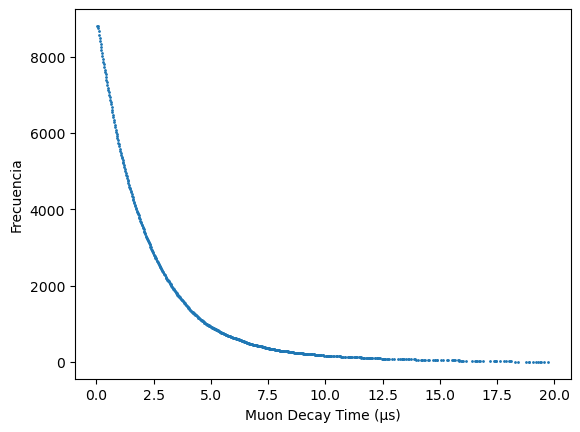

In [111]:
plt.scatter(Time, decay, s=1)
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión e incertidumbres)')

In [112]:
#def expo(x,a,b):
 #   return a*np.exp(-x/b)

In [113]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t/b), Time,decay)
incert =np.sqrt(np.diag(cov))

In [114]:
param, incert

(array([8.96652586e+03, 2.19309392e+00]),
 array([9.85799606e+00, 3.38230968e-03]))

In [115]:
param[1]

2.1930939226028237

In [116]:
x=np.linspace(0,20,len(decay))
#y=expo(x,param[0], param[1])
y=param[0]*np.exp(-x/param[1])
y

array([8.96652586e+03, 8.83282015e+03, 8.70110821e+03, 8.57136032e+03,
       8.44354718e+03, 8.31763994e+03, 8.19361019e+03, 8.07142993e+03,
       7.95107158e+03, 7.83250797e+03, 7.71571234e+03, 7.60065833e+03,
       7.48731996e+03, 7.37567165e+03, 7.26568821e+03, 7.15734479e+03,
       7.05061696e+03, 6.94548062e+03, 6.84191203e+03, 6.73988782e+03,
       6.63938496e+03, 6.54038077e+03, 6.44285289e+03, 6.34677931e+03,
       6.25213835e+03, 6.15890864e+03, 6.06706914e+03, 5.97659912e+03,
       5.88747815e+03, 5.79968613e+03, 5.71320323e+03, 5.62800994e+03,
       5.54408701e+03, 5.46141552e+03, 5.37997679e+03, 5.29975245e+03,
       5.22072439e+03, 5.14287477e+03, 5.06618601e+03, 4.99064081e+03,
       4.91622211e+03, 4.84291312e+03, 4.77069729e+03, 4.69955831e+03,
       4.62948013e+03, 4.56044694e+03, 4.49244314e+03, 4.42545340e+03,
       4.35946258e+03, 4.29445579e+03, 4.23041836e+03, 4.16733584e+03,
       4.10519398e+03, 4.04397875e+03, 3.98367635e+03, 3.92427316e+03,
      

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión)')

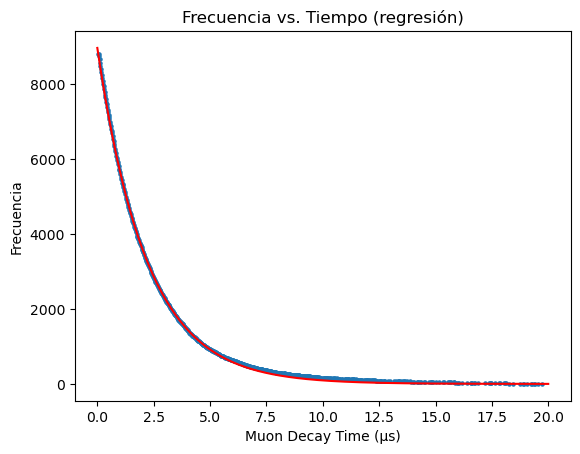

In [136]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)

plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión)')

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión e incertidumbres)')

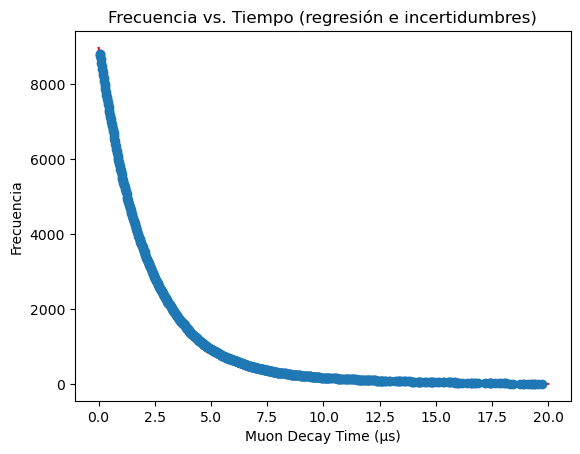

In [137]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión e incertidumbres)')

In [118]:
y_fit=param[0]*np.exp(-Time/param[1])

In [119]:
residual=(decay-y_fit)

In [122]:
xc=np.linspace(0,20,1000)
yc =np.zeros(len(xc))

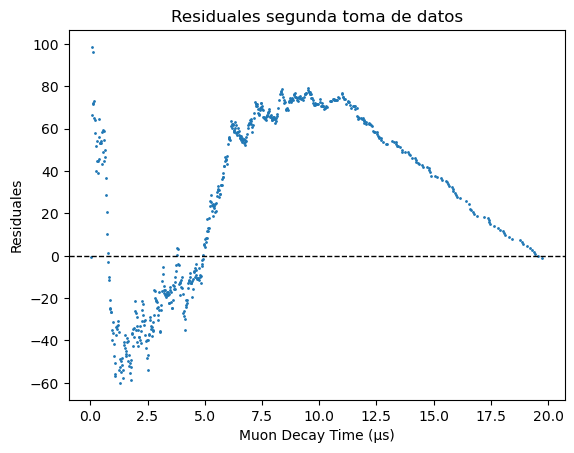

In [134]:
fig, ax = plt.subplots()
ax.set_title('Residuales segunda toma de datos')
ax.scatter(Time,residual, s=1)
ax.set_xlabel('Muon Decay Time (µs)')
ax.set_ylabel('Residuales')
ax.axhline(0, color='black', linewidth=1, linestyle='--')